In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Partiendo del método mostrado en el cuaderno 13-MonteCarlo2.ipynb, se modifica el código para adaptaro 
# al modelo de Isiing 3D.
N=20 # Parámetro fijado en el enunciado del modelo.
lattice=np.ones((N,N,N))
T=10. # Temperatura inicial.
beta=1./T
def total_energy(): 
    global lattice
    return -sum(sum(sum(lattice*(np.roll(lattice,1,axis=1)+\
                             np.roll(lattice,-1,axis=1)+\
                             np.roll(lattice,1,axis=0)+\
                             np.roll(lattice,-1,axis=0)+\
                             np.roll(lattice,1,axis=2)+\
                             np.roll(lattice,-1,axis=2)
                            )))) # Se pone una suma triple pues estamos en 3D.
def block_energy(i,j,k):
    global lattice
    global N
    return -(lattice[i,j,k]*(lattice[(i-1)%N,j,k]+\
                                  lattice[(i+1)%N,j,k]+\
                                  lattice[i,(j+1)%N,k]+\
                                  lattice[i,(j-1)%N,k]+\
                                  lattice[i,j,(k+1)%N]+\
                                  lattice[i,j,(k-1)%N])) # Dependencia de 3 variables pues estamos en 3D.
def flipone():
    global lattice
    global beta
    global N
    # Pick a random site
    nx, ny, nz= np.random.randint(0,N),np.random.randint(0,N),np.random.randint(0,N) # Nuevamente, se crean 
                                                                                     # 3 números aleatorios
                                                                                     # pues estamo en 3D.
    # Calculate current energy of site and neighbors
    en_i=block_energy(nx,ny,nz)
    # If it were flipped
    en_f=-en_i
    if en_f<en_i: # This could be simplified
        lattice[nx,ny,nz]*=-1
    elif np.random.random()<min(1,np.exp(-beta*(en_f-en_i))):
        lattice[nx,ny,nz]*=-1 

def magnetization():
    global lattice
    global N
    return sum(sum(sum(lattice)))/N**3 # Triple suma y división sobre N³ pues estamos en 3D.

In [5]:
magnetization() # Magnetización para la temperatura fijada inicialmente, a saber 10.

-0.01175

In [34]:
magnetizaciones=[] # Array en el que se guarda la informcación sobre magnetizaciones.
lattice=np.ones((N,N,N))
numIter=10**6 # Número de iteraciones solicitado en el enunciado.
for temp in np.linspace(1.,8.,71):
    print temp,
    T=temp
    beta=1./T
    mag=[]
    for i in range(numIter):
        flipone()
        if i>numIter-10: # Solo se usan los últimos 10 estados calculados para cada temperatura.
            mag.append(magnetization())
    magnetizaciones.append([T,np.mean(mag)])
magnetizaciones=np.array(magnetizaciones)

 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.0 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.0 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.0 7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.0


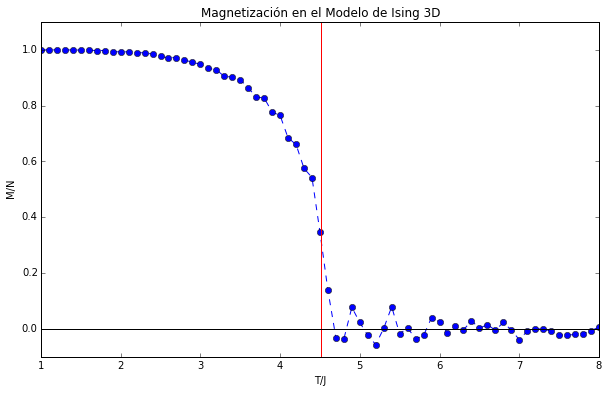

In [48]:
# Gráfica de la magnetización vs. temperaura.
plt.figure(figsize=(10,6))
plt.plot(magnetizaciones[:,0],magnetizaciones[:,1],"o--")
plt.xlabel("T/J")
plt.ylabel("M/N")
plt.title(u"Magnetización en el Modelo de Ising 3D" ) 
plt.ylim(-0.1,1.1)
plt.axvline(4.51, color='red')
plt.axhline(0., color = 'k')
plt.show()